Exercise Description

Download full dataset, which is a Matlab format of THE MNIST DATABASE of handwritten digits: A training set of 60,000 examples, and a test set of 10,000 examples; each having a size of 28 x 28 = 784 (concatenating the pixels). Read the linked webpage for more details.
Do exercise:  
* (1) from the 10-class database, choose three classes (5, 6 and 8) and then reduce dimension to 2; 
* (2) perform 3-class classification based on the generated 2-dimensional data.

In [13]:
# Importing libraries and packages
import numpy as np
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data path
data_path = "../Data/"

In [14]:
# Loading training and test data - divide by 255 to normalize
train5 = np.loadtxt(data_path+"train5.txt")/255
train6 = np.loadtxt(data_path+"train6.txt")/255
train8 = np.loadtxt(data_path+"train8.txt")/255

# Define targets 
train5_target = 5*np.ones(len(train5))
train6_target = 6*np.ones(len(train6))
train8_target = 8*np.ones(len(train8))

# Combine data
train_data = np.concatenate([train5, train6, train8])
train_targets = np.concatenate([train5_target, train6_target, train8_target])

test5 = np.loadtxt(data_path+"test5.txt")/255
test6 = np.loadtxt(data_path+"test6.txt")/255
test8 = np.loadtxt(data_path+"test8.txt")/255

# Define targets 
test5_target = 5*np.ones(len(test5))
test6_target = 6*np.ones(len(test6))
test8_target = 8*np.ones(len(test8))

# Combine
test_data = np.concatenate([test5, test6, test8])
test_targets = np.concatenate([test5_target, test6_target, test8_target])

# Class names
classes = np.array([5,6,8])

# Part 1: Reduce dimension to 2
Here, we wish to reduce the data dimensionality from 784 to 2 using either PCA or LDA.
For this you can use scikit-learn.

Using PCA:

The PCA class in scikit-learn fits a covariance matrix and compute eigenvectors for you. 
PCA doesn't assume any knowledge about the classes, so you have to use the concatenated training set.

In [24]:
# To reduce the dimension from 784 to 2 we choose the corresponding number of principal components. We fit the combined training data to th
pca = PCA(n_components=2)
pca_fit = pca.fit(train_data)

# Transform train data from each class using fitted PCA instance
pca_transform = pca.transform(train_data)

print(pca)
print(pca_fit)
print(pca_transform)

PCA(n_components=2)
PCA(n_components=2)
[[-1.50392748 -0.07382506]
 [-0.47967028 -2.54743959]
 [-1.36584105 -2.71526017]
 ...
 [-1.85638839 -1.17240432]
 [-2.71620433 -0.14798957]
 [-1.40171682 -2.09906686]]


Using LDA:

We can also use Linear Disicriminant Analysis to reduce the dimensionality of the data.
The LDA class in scikit-learn fits a covariance matrix and compute eigenvectors for you. LDA assume that you know about the classes, so you have to use the concatenated training set and targets/classes.

In [25]:
# As with PCA we choose the number of components in correspondence with the dimensionality reduction (784 to 2)
lda = LDA(n_components=2)
lda_fit = lda.fit(train_data, train_targets)

# Transform train data from each class using fitted LDA instance
lda_transform = lda.transform(train_data)

print(lda)
print(lda_fit)
print(lda_transform)

LinearDiscriminantAnalysis(n_components=2)
LinearDiscriminantAnalysis(n_components=2)
[[ 1.75894277  2.7068503 ]
 [ 1.80875651  0.18745023]
 [ 1.44947416  1.61714281]
 ...
 [ 1.92437407 -1.10075981]
 [ 2.63698222 -2.56954623]
 [ 1.52062758 -0.48341988]]


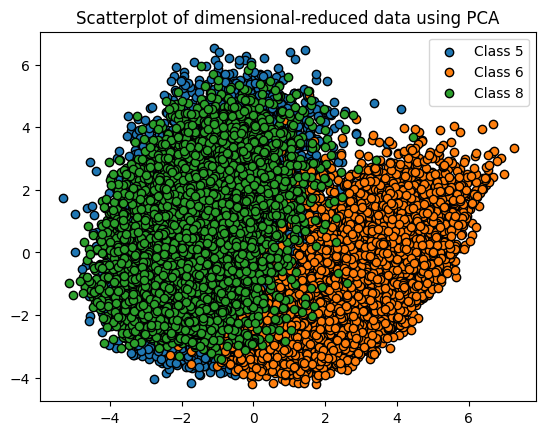

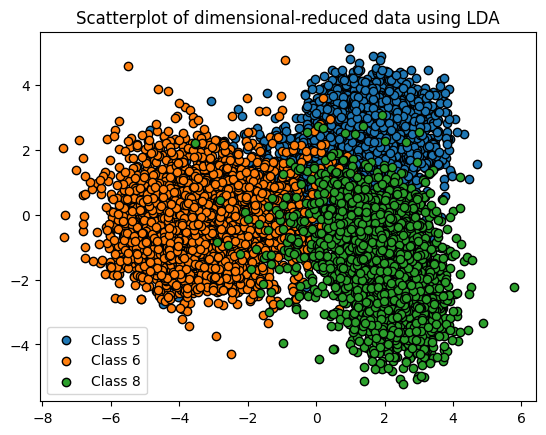

In [39]:
#Scatter plot of the dimensional-reduced data, PCA
plt.scatter(pca_transform[:len(train5), 0], pca_transform[:len(train5), 1], edgecolors="k")
plt.scatter(pca_transform[len(train5):len(train5)+len(train6), 0], pca_transform[len(train5):len(train5)+len(train6), 1], edgecolors="k")
plt.scatter(pca_transform[len(train5)+len(train6):, 0], pca_transform[len(train5)+len(train6):, 1], edgecolors="k")
plt.legend(["Class 5", "Class 6", "Class 8"])
plt.title("Scatterplot of dimensional-reduced data using PCA")
plt.show()

#Scatter plot of the dimensional-reduced data, LDA
plt.scatter(lda_transform[:len(train5), 0], lda_transform[:len(train5), 1], edgecolors="k")
plt.scatter(lda_transform[len(train5):len(train5)+len(train6), 0], lda_transform[len(train5):len(train5)+len(train6), 1], edgecolors="k")
plt.scatter(lda_transform[len(train5)+len(train6):, 0], lda_transform[len(train5)+len(train6):, 1], edgecolors="k")
plt.legend(["Class 5", "Class 6", "Class 8"])
plt.title("Scatterplot of dimensional-reduced data using LDA")
plt.show()

# Part 2: Perform 3-class classification based on the generated 2-dimensional data. 
We need to find a model to classify the test data as either 5, 6, or 8.
Here, we could use a Gaussian model for each class, and estimate the mean and covariance from the dimensionality reduced data.

## Estimate Gaussians using 2-dimensional data obtained from PCA

In [ ]:
# Estimate parameters for a bivariante Gaussian distribution.

# Compute statistics for all three classes
# Compute likelihood and posterior probs. for all three classes
# Classify

## Estimate Gaussians using 2-dimensional data obtained from LDA

In [ ]:
# Estimate parameters for a bivariante Gaussian distribution.


## Classifying test data
To classify the test data, we first transform it to 2-dimensions as well.

In [ ]:
# Transform test data using fitted PCA/LDA instance


In [ ]:
# Compute priors
# Compute Likelihoods
# Compute posteriors
# Compute predictions
# Compute accuracy